1. Carregando tabelas necessárias...
   Itens carregados: 112650
   Produtos carregados: 32951

 Produto Analisado (Best Seller): aca2eb7d00ea1a7b8ebd4e68314663af
   Categoria: moveis_decoracao

--- RESULTADO ---
Elasticidade - Preço encontrada: -18.09


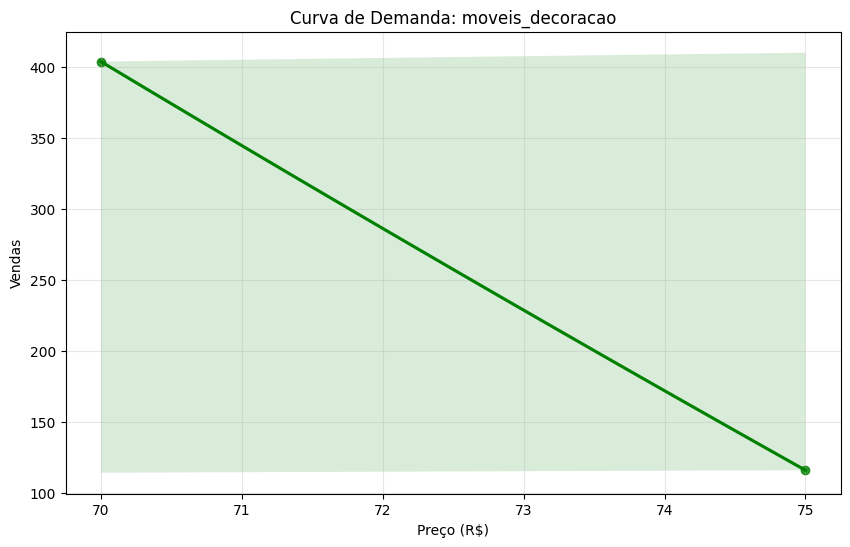

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

print("1. Carregando tabelas necessárias...")

df_items = pd.read_csv('olist_order_items_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')

print(f"   Itens carregados: {len(df_items)}")
print(f"   Produtos carregados: {len(df_products)}")

# Cruzando as tabelas (Merge) ---

df = pd.merge(df_items, df_products, on='product_id')

# selecionando o omelhor produto
top_product = df['product_id'].value_counts().idxmax()
nome_categoria = df[df['product_id'] == top_product]['product_category_name'].iloc[0]

print(f"\n Produto Analisado (Best Seller): {top_product}")
print(f"   Categoria: {nome_categoria}")


df_prod = df[df['product_id'] == top_product].copy()


df_prod['price_round'] = df_prod['price'].round(0)
demand_curve = df_prod.groupby('price_round')['order_item_id'].count().reset_index()
demand_curve.columns = ['Preco', 'Qtd_Vendas']

# filtrar ruídos
demand_curve = demand_curve[demand_curve['Qtd_Vendas'] > 5]

# calculando a elasticidade
demand_curve['log_Preco'] = np.log(demand_curve['Preco'])
demand_curve['log_Vendas'] = np.log(demand_curve['Qtd_Vendas'])

# regressao
X = sm.add_constant(demand_curve['log_Preco'])
modelo = sm.OLS(demand_curve['log_Vendas'], X).fit()
elasticidade = modelo.params['log_Preco']

print("\n--- RESULTADO ---")
print(f"Elasticidade - Preço encontrada: {elasticidade:.2f}")

# montando grafico
plt.figure(figsize=(10, 6))
sns.regplot(x='Preco', y='Qtd_Vendas', data=demand_curve, logx=True, color='green')
plt.title(f'Curva de Demanda: {nome_categoria}')
plt.xlabel('Preço (R$)')
plt.ylabel('Vendas')
plt.grid(True, alpha=0.3)
plt.show()